### Objetivo:  Explorar factores socio-económicos que influyen en la decisión de optar entre universidad o instituto. Para lo cual el notebook se divide en tres secciones:
SECCIÓN A: Carga,limpieza y trabajo de las bases de datos analizadas 

SECCIÓN B: Análisis de las bases de datos

SECCIÓN C: Conclusiones

### SECCIÓN A: Carga, limpieza y trabajo de las bases de datos analizadas:
#### El presente análisis hace uso de las bases de datos de encuestas nacionales de hogares del 2017 del Perú. Para ello, se realizó la unión de los módulos de características individuales (Base 200), del nivel educativo (Base 300) y de ingresos (Base sumaria). Adicionalmente, se ha utilizado la base de ubigeos y shapes  para mapear los departamentos en el 2017. Por último, se añadió una base con los nombres de universidades e institutos, los que permitieron identificar si son privados o públicos.
1. Limpieza y creación de indicadores con BASE 200
2. Limpieza y creación de indicadores con BASE 300
3. Unión de bases 200, 300 y Sumaria
4. Limpieza y creación de indicadores con BASE geográfica (shape)
5. Limpieza y creación de indicadores con BASE de nombres de las instituciones educativas

#### 1. LIMPIEZA BASE 200. CARACTERISTICAS INDIVIDUALES
#### En este módulo nos vamos a quedar con las características individuales de interés de los estudiantes (edad, sexo, parentesco) 

In [2]:
import numpy as np
import pandas as pd
import os
data200o=pd.read_stata("https://www.dropbox.com/s/5cx86wzwf1fjhb0/enaho01-2017-200.dta?dl=1")
data200 = data200o[['ubigeo','dominio','conglome','vivienda','hogar','codperso','facpob07', 'p203','p204','p207','p208a', 'p208a1','p208a2', 'p209']]
data200.rename(columns={'p203':'parentesco','p204':'mieho', 'p207':'sexo', 'p208a':'edad','p208a1':'nacio_dist','p208a2':'lugar_nac', 'p209':'est_civil'}, inplace=True)


C:\Users\claud\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [3]:
data200 = data200[(data200['mieho']=='si')]
data200 = data200[(data200['parentesco']=='hijo/hija')]
data200 = data200.drop(columns=['parentesco'])
data200 = data200[(data200['edad']>=17) & (data200['edad']<=35)]
data200.head()

,ubigeo,dominio,conglome,vivienda,hogar,codperso,facpob07,mieho,sexo,edad,nacio_dist,lugar_nac,est_civil
17,010101,sierra norte,005001,088,11,03,76.290199,si,hombre,18.0,nació en este distrito,010101,soltero(a)
18,010101,sierra norte,005001,088,11,04,76.290199,si,mujer,30.0,nació en este distrito,010101,separado(a)
28,010101,sierra norte,005002,034,11,02,75.795334,si,mujer,21.0,nació en este distrito,010101,soltero(a)
29,010101,sierra norte,005002,034,11,03,75.795334,si,mujer,20.0,nació en este distrito,010101,soltero(a)
30,010101,sierra norte,005002,034,11,04,75.795334,si,mujer,18.0,nació en este distrito,010101,soltero(a)


#### 2. LIMPIEZA BASE 300. CARACTERISTICAS DE EDUCACIÓN
#### En este módulo nos vamos a quedar con las características relacionadas al nivel educativo de los estudiantes (nivel en el que está matriculado). Además se crea una variable dicotómica, que identifique al estudiante que alcanza el nivel educativo superior universitario o no universitario (técnico), y el resto nulo. Ello, nos permitirá hacer distintos graficos más adelante.

In [4]:
data300o=pd.read_stata("https://www.dropbox.com/s/wl15uutlnnu0g0c/enaho01a-2017-300.dta?dl=1")
data300 = data300o[['ubigeo','dominio','conglome','vivienda','hogar','codperso','factor07','p203', 'p308a','p301b1', 'p304a', 'p301d']]
data300 = data300[(data300['p203']=='hijo/hija')]
data300.head()

,ubigeo,dominio,conglome,vivienda,hogar,codperso,factor07,p203,p308a,p301b1,p304a,p301d
1,010101,sierra norte,005001,002,11,02,76.290199,hijo/hija,NaN,NaN,NaN,estatal
2,010101,sierra norte,005001,002,11,03,76.290199,hijo/hija,NaN,NaN,NaN,estatal
5,010101,sierra norte,005001,023,11,03,76.290199,hijo/hija,secundaria,NaN,primaria,estatal
6,010101,sierra norte,005001,023,11,04,76.290199,hijo/hija,primaria,NaN,primaria,estatal
7,010101,sierra norte,005001,023,11,05,76.290199,hijo/hija,educacion inicial,NaN,educación inicial,estatal


In [5]:
data300['centro_pub_priv']=data300[(data300['p301d']=='estatal') | (data300['p301d']=='no estatal')]['p301d']
data300['niv_superior_hijo']=data300[(data300['p308a']=='superior universitaria') | (data300['p308a']=='superior no universitaria')]['p308a']
data300['niv_superior_hijo'].unique()

[NaN, superior universitaria, superior no universitaria]
Categories (2, object): [superior no universitaria < superior universitaria]

In [6]:
data300.rename(columns={'p308a':'nivel_educat_hijo', 'p301b1':'cod_centro'}, inplace=True)
data300 = data300.drop(columns=['p203','p301d','p304a'])
data300.head()

,ubigeo,dominio,conglome,vivienda,hogar,codperso,factor07,nivel_educat_hijo,cod_centro,centro_pub_priv,niv_superior_hijo
1,010101,sierra norte,005001,002,11,02,76.290199,NaN,NaN,estatal,NaN
2,010101,sierra norte,005001,002,11,03,76.290199,NaN,NaN,estatal,NaN
5,010101,sierra norte,005001,023,11,03,76.290199,secundaria,NaN,estatal,NaN
6,010101,sierra norte,005001,023,11,04,76.290199,primaria,NaN,estatal,NaN
7,010101,sierra norte,005001,023,11,05,76.290199,educacion inicial,NaN,estatal,NaN


#### Data 300jh: nivel educativo del jefe del hogar
##### En esta sección, identificamos el nivel educativo alcanzado del jefe o jefa del hogar. Dado que es una variable frecuente y que queremos cruzar con el nivel educativo del hijo/hija, se procede a realizar un merge por hogar.


In [7]:
data300jh = data300o[['ubigeo','dominio','conglome','vivienda','hogar','codperso','factor07','p203','p301a']]
data300jh = data300jh[(data300jh['p203']=='jefe/jefa')]
data300jh = data300jh.drop(columns=['p203'])

In [8]:
#nivel educativo del padre
data300jh['cnivel_educat_jh']=data300jh['p301a']
nivel_educat={'cnivel_educat_jh':{'sin nivel':1,'educación inicial':1,'primaria incompleta':1,'primaria completa':1,'secundaria incompleta':1,'secundaria completa':1,'superior no universitaria incompleta':2,'superior no universitaria completa':2,'superior universitaria incompleta':3,'superior universitaria completa':3,'postgrado universitario':3}}
data300jh.replace(nivel_educat,inplace=True)
data300jh.rename(columns={'p301a':'nivel_educat_jh'}, inplace=True)
data300jh = data300jh[['conglome','vivienda','hogar','nivel_educat_jh','cnivel_educat_jh']]
data300jh.head()

,conglome,vivienda,hogar,nivel_educat_jh,cnivel_educat_jh
0,005001,002,11,primaria completa,1.0
3,005001,023,11,secundaria incompleta,1.0
8,005001,035,11,sin nivel,1.0
10,005001,046,11,primaria incompleta,1.0
13,005001,067,11,primaria incompleta,1.0


In [9]:
data_300_300jh=pd.merge(data300,data300jh, how='outer',on=['conglome','vivienda','hogar'],indicator=True,left_index=True)
data_300_300jh = data_300_300jh[(data_300_300jh['_merge']=='both')]
data_300_300jh = data_300_300jh.drop(columns=['_merge','ubigeo','dominio'])
data_300_300jh.head()

,conglome,vivienda,hogar,codperso,factor07,nivel_educat_hijo,cod_centro,centro_pub_priv,niv_superior_hijo,nivel_educat_jh,cnivel_educat_jh
0,005001,002,11,02,76.290199,NaN,NaN,estatal,NaN,primaria completa,1.0
0,005001,002,11,03,76.290199,NaN,NaN,estatal,NaN,primaria completa,1.0
3,005001,023,11,03,76.290199,secundaria,NaN,estatal,NaN,secundaria incompleta,1.0
3,005001,023,11,04,76.290199,primaria,NaN,estatal,NaN,secundaria incompleta,1.0
3,005001,023,11,05,76.290199,educacion inicial,NaN,estatal,NaN,secundaria incompleta,1.0


### 3. Unión de las tres bases de interés de los módulos 200 con 300 y Sumaria

In [10]:
data_200_300=pd.merge(data_300_300jh,data200, how='outer',on=['conglome','vivienda','hogar','codperso'],indicator=True,left_index=True)
data_200_300 = data_200_300[(data_200_300['_merge']=='both')]
data_200_300 = data_200_300.drop(columns=['_merge'])
data_200_300.head()

,conglome,vivienda,hogar,codperso,factor07,nivel_educat_hijo,cod_centro,centro_pub_priv,niv_superior_hijo,nivel_educat_jh,cnivel_educat_jh,ubigeo,dominio,facpob07,mieho,sexo,edad,nacio_dist,lugar_nac,est_civil
17,005001,088,11,03,76.290199,secundaria,NaN,estatal,NaN,primaria incompleta,1.0,010101,sierra norte,76.290199,si,hombre,18.0,nació en este distrito,010101,soltero(a)
18,005001,088,11,04,76.290199,NaN,160000076.0,estatal,NaN,primaria incompleta,1.0,010101,sierra norte,76.290199,si,mujer,30.0,nació en este distrito,010101,separado(a)
28,005002,034,11,02,75.795334,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,010101,sierra norte,75.795334,si,mujer,21.0,nació en este distrito,010101,soltero(a)
29,005002,034,11,03,75.795334,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,010101,sierra norte,75.795334,si,mujer,20.0,nació en este distrito,010101,soltero(a)
30,005002,034,11,04,75.795334,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,010101,sierra norte,75.795334,si,mujer,18.0,nació en este distrito,010101,soltero(a)


#### Se une bases modulo 200 - 300 con Sumaria (ingresos del hogar)

In [11]:
sumariao=pd.read_stata("https://www.dropbox.com/s/j5aclz6k7fi454z/sumaria-2017.dta?dl=1")
sumaria=sumariao[['conglome','vivienda','hogar','factor07','gashog2d','linea','mieperho','pobreza', 'estrsocial']]


In [12]:
data_200_300_sum=pd.merge(data_200_300,sumaria, how='outer',on=['conglome','vivienda','hogar'],indicator=True,left_index=True)
data_200_300_sum = data_200_300_sum[(data_200_300_sum['_merge']=='both')]
data_200_300_sum = data_200_300_sum.drop(columns=['_merge'])
data_200_300_sum=data_200_300_sum.drop(columns=['factor07_y','factor07_x','lugar_nac','linea','est_civil'])
data_200_300_sum.head()

,conglome,vivienda,hogar,codperso,nivel_educat_hijo,cod_centro,centro_pub_priv,niv_superior_hijo,nivel_educat_jh,cnivel_educat_jh,...,dominio,facpob07,mieho,sexo,edad,nacio_dist,gashog2d,mieperho,pobreza,estrsocial
5,005001,088,11,03,secundaria,NaN,estatal,NaN,primaria incompleta,1.0,...,sierra norte,76.290199,si,hombre,18.0,nació en este distrito,29938.256674,6,no pobre,e
5,005001,088,11,04,NaN,160000076.0,estatal,NaN,primaria incompleta,1.0,...,sierra norte,76.290199,si,mujer,30.0,nació en este distrito,29938.256674,6,no pobre,e
7,005002,034,11,02,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,...,sierra norte,75.795334,si,mujer,21.0,nació en este distrito,28569.724534,4,no pobre,d
7,005002,034,11,03,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,...,sierra norte,75.795334,si,mujer,20.0,nació en este distrito,28569.724534,4,no pobre,d
7,005002,034,11,04,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,...,sierra norte,75.795334,si,mujer,18.0,nació en este distrito,28569.724534,4,no pobre,d


In [13]:
data_200_300_sum.to_excel('data_enaho2017.xlsx', sheet_name='sheet1', index=False)

### 4. Se crea una base de los datos 2017 de los estudiantes con la data shape de los límites departamentales del Perú

In [14]:
import numpy as np
import pandas as pd
import os

data2017=pd.read_excel("https://www.dropbox.com/s/mmk5gp8xf9loin2/data_enaho2017.xlsx?dl=1", sheet_name='sheet1', index=False)


In [15]:
data2017['ubigeo']=data2017['ubigeo'].apply(str)
data2017['ubigeo_dpto']=np.where((data2017['ubigeo'].apply(len))==5,data2017['ubigeo'].str[0:1],data2017['ubigeo'].str[0:2])
data2017['ubigeo_dpto2']=data2017['ubigeo_dpto']

In [16]:
Yeap={"ubigeo_dpto2":{"1":"AMAZONAS","2":"ANCASH","3":"APURIMAC","4":"AREQUIPA","5":"AYACUCHO","6":"CAJAMARCA","7":"CALLAO",
                     "8":"CUSCO","9":"HUANCAVELICA","10":"HUANUCO","11":"ICA","12":"JUNIN","13":"LA LIBERTAD","14":"LAMBAYEQUE",
                      "15":"LIMA","16":"LORETO","17":"MADRE DE DIOS","18":"MOQUEGUA","19":"PASCO","20":"PIURA","21":"PUNO",
                     "22":"SAN MARTIN","23":"TACNA","24":"TUMBES", "25":"UCAYALI"}}
data2017.replace(Yeap,inplace=True)

In [17]:
data2017_dpto=data2017.pivot_table("codperso",index=["ubigeo_dpto2"],columns=["niv_superior_hijo"],aggfunc="count")
data2017_dpto = data2017_dpto.reset_index()
data2017_dpto.rename(columns={'ubigeo_dpto2':'NOMBDEP'}, inplace=True)
data2017_dpto.to_excel('data2017_dpto.xlsx', sheet_name='sheet1', index=False)
data2017_dpto.head()

niv_superior_hijo,NOMBDEP,superior no universitaria,superior universitaria
0,AMAZONAS,39,125
1,ANCASH,49,138
2,APURIMAC,20,74
3,AREQUIPA,90,171
4,AYACUCHO,35,70


### 5. Se une la base 2017 con los datos de los estudiantes, los nombres y tipo de gestión (privada o pública) de las universidades e institutos

In [18]:
import numpy as np
import pandas as pd
import os

instituciones=pd.read_excel("https://www.dropbox.com/s/a633g38mat4p74u/ENAHO-CODIGO%20DE%20INSTITUCIONES%20EDUCATIVAS.xlsx?dl=1", 
                        sheet_name='códigos', 
                        skiprows=2)
instituciones.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,16- Universidades Públicas,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,160000022.0,Universidad Nacional Agraria de la Selva
3,NaN,NaN,160000007.0,Universidad Nacional Agraria La Molina
4,NaN,NaN,160000075.0,Universidad Nacional Amazónica de Madre de Dios


In [19]:
instituciones['Unnamed: 1'].unique()
instituciones = instituciones.drop(columns=['Unnamed: 0'])
instituciones.rename(columns={'Unnamed: 2':'codigo','Unnamed: 3':'nombre'}, inplace=True)
instituciones.head()

,Unnamed: 1,codigo,nombre
0,16- Universidades Públicas,NaN,NaN
1,NaN,NaN,NaN
2,NaN,160000022.0,Universidad Nacional Agraria de la Selva
3,NaN,160000007.0,Universidad Nacional Agraria La Molina
4,NaN,160000075.0,Universidad Nacional Amazónica de Madre de Dios


In [20]:
instituciones['codigo1']=instituciones['codigo'].astype(str).str[0:2]
instituciones['codigo0']=instituciones['codigo1']
instituciones.head()

,Unnamed: 1,codigo,nombre,codigo1,codigo0
0,16- Universidades Públicas,NaN,NaN,na,na
1,NaN,NaN,NaN,na,na
2,NaN,160000022.0,Universidad Nacional Agraria de la Selva,16,16
3,NaN,160000007.0,Universidad Nacional Agraria La Molina,16,16
4,NaN,160000075.0,Universidad Nacional Amazónica de Madre de Dios,16,16


In [21]:
tipos={'codigo0':{'16': 'Universidades Públicas',
       '15': 'Instituto Superior Pedagógico Públicos',
       '14': 'Institutos de Educación Superior Tecnológica (IEST) Públicos',
       '13': 'Centros de Educación Técnico Productiva (CETPRO) Públicos',
       '17': 'Educación Superior de Formación Artísitca Pública',
       '18': 'Escuelas e Institutos de Educación Superior Tecnológicos de las Fuerzas Armadas y Policiales',
       '26': 'Universidades Privadas',
       '25': 'Instituto Superior Pedagógico Privado',
       '24': 'Instituto de Educación Superior Tecnológica (IEST) Privado',
       '23': 'Centros de Educación Técnico Productiva (CETPRO) Privado',
       '27': 'Educación Superior de Formación Artística'}}

instituciones.replace(tipos,inplace=True)

In [22]:
instituciones=instituciones.drop(columns=['Unnamed: 1'])
instituciones=instituciones.dropna(axis=0)
instituciones.rename(columns={'codigo':'cod_centro'}, inplace=True)
instituciones.rename(columns={'codigo':'cod_centro'}, inplace=True)
instituciones.head()

,cod_centro,nombre,codigo1,codigo0
2,160000022.0,Universidad Nacional Agraria de la Selva,16,Universidades Públicas
3,160000007.0,Universidad Nacional Agraria La Molina,16,Universidades Públicas
4,160000075.0,Universidad Nacional Amazónica de Madre de Dios,16,Universidades Públicas
5,160000127.0,Universidad Nacional Autónoma Altoandina de Tarma,16,Universidades Públicas
6,160000126.0,Universidad Nacional Autónoma de Alto Amazonas,16,Universidades Públicas


In [23]:
data2017=pd.read_excel("https://www.dropbox.com/s/mmk5gp8xf9loin2/data_enaho2017.xlsx?dl=1", 
                        sheet_name='sheet1')
data2=pd.merge(data2017,instituciones, how='outer',on=['cod_centro'],indicator=True,left_index=True)
data2 = data2[(data2['_merge']=='both')]
data2.head()

,conglome,vivienda,hogar,codperso,nivel_educat_hijo,cod_centro,centro_pub_priv,niv_superior_hijo,nivel_educat_jh,cnivel_educat_jh,...,edad,nacio_dist,gashog2d,mieperho,pobreza,estrsocial,nombre,codigo1,codigo0,_merge
51,5001.0,88.0,11.0,4.0,NaN,160000076.0,estatal,NaN,primaria incompleta,1.0,...,30.0,nació en este distrito,29938.256674,6.0,no pobre,e,Universidad Nacional Toribio Rodríguez de Mend...,16,Universidades Públicas,both
51,5002.0,34.0,11.0,2.0,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,...,21.0,nació en este distrito,28569.724534,4.0,no pobre,d,Universidad Nacional Toribio Rodríguez de Mend...,16,Universidades Públicas,both
51,5002.0,34.0,11.0,3.0,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,...,20.0,nació en este distrito,28569.724534,4.0,no pobre,d,Universidad Nacional Toribio Rodríguez de Mend...,16,Universidades Públicas,both
51,5002.0,34.0,11.0,4.0,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,...,18.0,nació en este distrito,28569.724534,4.0,no pobre,d,Universidad Nacional Toribio Rodríguez de Mend...,16,Universidades Públicas,both
51,5002.0,71.0,11.0,3.0,NaN,160000076.0,estatal,NaN,secundaria incompleta,1.0,...,31.0,pase,32406.811589,3.0,no pobre,d,Universidad Nacional Toribio Rodríguez de Mend...,16,Universidades Públicas,both


In [24]:
data2['codigo1'] = data2['codigo1'].apply(pd.to_numeric, errors='coerce')
data3 = data2[(data2['codigo1']==16)|(data2['codigo1']==26)|(data2['codigo1']==14)|(data2['codigo1']==24)]
insti={'codigo1':{14:'IEST Púb.',16: 'U. Púb.',24: 'IEST Priv.',26:'U. Priv'}}
data3.replace(insti, inplace = True)

C:\Users\claud\Anaconda3\lib\site-packages\pandas\core\generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [25]:
data3['niv_superior_hijo2'] = data3['niv_superior_hijo']
data3['niv_superior_hijo2'] = np.where((data3['codigo1']=='IEST Púb') & (data3['niv_superior_hijo']=='superior universitaria'), '', 'niv_superior_hijo')

C:\Users\claud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\claud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
conditions  = [ (data3['codigo1']=='IEST Púb.') & (data3['niv_superior_hijo']=='superior universitaria'),
               (data3['codigo1']=='IEST Priv.') & (data3['niv_superior_hijo']=='superior universitaria'),
               (data3['codigo1']=='U. Púb.') & (data3['niv_superior_hijo']=='superior no universitaria'),
              (data3['codigo1']=='U. Priv') & (data3['niv_superior_hijo']=='superior no universitaria')]
choices     = [ np.nan, np.nan, np.nan,np.nan ]
data3["niv2"] = np.select(conditions, choices, default=data3['niv_superior_hijo'])
data3.to_excel('data3.xlsx', sheet_name='sheet1', index=False)

C:\Users\claud\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
ubigeos=pd.read_excel("https://www.dropbox.com/s/z7b8s6e31yo34yr/ubigeos.xlsx?dl=1", 
                        sheet_name='ubigeo_inei')
data3=pd.merge(data3,ubigeos, how='outer',on=['ubigeo'],left_index=True)
data3.head()

,conglome,vivienda,hogar,codperso,nivel_educat_hijo,cod_centro,centro_pub_priv,niv_superior_hijo,nivel_educat_jh,cnivel_educat_jh,...,niv_superior_hijo2,niv2,Ubigeo,Distrito,Provincia,Departamento,Poblacion,Superficie,Y,X
0,5001.0,88.0,11.0,4.0,NaN,160000076.0,estatal,NaN,primaria incompleta,1.0,...,niv_superior_hijo,NaN,10101.0,Chachapoyas,Chachapoyas,Amazonas,29171.0,153.78,-6.2294,-77.8714
0,5002.0,34.0,11.0,2.0,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,...,niv_superior_hijo,superior universitaria,10101.0,Chachapoyas,Chachapoyas,Amazonas,29171.0,153.78,-6.2294,-77.8714
0,5002.0,34.0,11.0,3.0,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,...,niv_superior_hijo,superior universitaria,10101.0,Chachapoyas,Chachapoyas,Amazonas,29171.0,153.78,-6.2294,-77.8714
0,5002.0,34.0,11.0,4.0,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1.0,...,niv_superior_hijo,superior universitaria,10101.0,Chachapoyas,Chachapoyas,Amazonas,29171.0,153.78,-6.2294,-77.8714
0,5002.0,71.0,11.0,3.0,NaN,160000076.0,estatal,NaN,secundaria incompleta,1.0,...,niv_superior_hijo,NaN,10101.0,Chachapoyas,Chachapoyas,Amazonas,29171.0,153.78,-6.2294,-77.8714


### B. SECCIÓN ANÁLISIS 
Una vez realizado la limpieza y creación de indicadores de interés con las bases del 2017. En esta sección se analiza las cruces y resultados de las variables como : 
 1. A nivel individual (edad y sexo)
 2. A nivel del hogar (nivel de ingresos, pobreza, y estrato social)
 3. A nivel de los padres (nivel educativo alcanzado),  
 4. Otros factores como si asistió o no a una escuela pública, y si migró o no del lugar de origen.
 5. A nivel de la ubicación geográfica (según departamentos y dominios de costa, sierra y selva) 
 6. Según si la oferta educativa es privada o pública

In [28]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

data2017=pd.read_excel("https://www.dropbox.com/s/mmk5gp8xf9loin2/data_enaho2017.xlsx?dl=1", sheet_name='sheet1', index=False)

In [29]:
data2017.head()

,conglome,vivienda,hogar,codperso,nivel_educat_hijo,cod_centro,centro_pub_priv,niv_superior_hijo,nivel_educat_jh,cnivel_educat_jh,...,dominio,facpob07,mieho,sexo,edad,nacio_dist,gashog2d,mieperho,pobreza,estrsocial
0,5001,88,11,3,secundaria,NaN,estatal,NaN,primaria incompleta,1,...,sierra norte,76.290199,si,hombre,18,nació en este distrito,29938.256674,6,no pobre,e
1,5001,88,11,4,NaN,160000076.0,estatal,NaN,primaria incompleta,1,...,sierra norte,76.290199,si,mujer,30,nació en este distrito,29938.256674,6,no pobre,e
2,5002,34,11,2,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1,...,sierra norte,75.795334,si,mujer,21,nació en este distrito,28569.724534,4,no pobre,d
3,5002,34,11,3,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1,...,sierra norte,75.795334,si,mujer,20,nació en este distrito,28569.724534,4,no pobre,d
4,5002,34,11,4,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1,...,sierra norte,75.795334,si,mujer,18,nació en este distrito,28569.724534,4,no pobre,d


### 1. Análisis exploratorio a partir de las características individuales:
#### Se observa que el porcentaje de estudiantes en educación universitaria (69.7%) casi duplica a la educación técnica (30.3%)

niv_superior_hijo
superior no universitaria    1392
superior universitaria       3197
Name: codperso, dtype: int64


Text(0.5, 1.0, 'Distribución porcentual de estudiantes en educación superior')

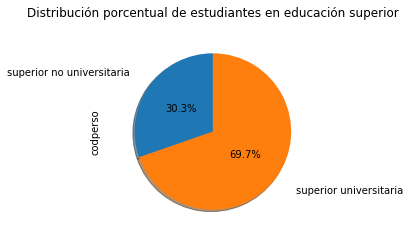

In [30]:
import matplotlib.pyplot as plt
estudiantes_superior = data2017.groupby("niv_superior_hijo").codperso.count()
print(estudiantes_superior)
estudiantes_superior.plot.pie(autopct='%1.1f%%', pctdistance=0.5, labeldistance=1.3, shadow=True, startangle=90, radius=0.9)
plt.title("Distribución porcentual de estudiantes en educación superior")

#### Según sexo,  aproximadamente 210 mil hombres y 200 mil mujeres entre 17 y 35 años matriculadas en educación técnica, mientras que 439 mil hombres y 486 mil mujeres en educación universitaria. Ello quiere decir que la educación técnica sería predominantemente masculina, mientras que la universitaria, femenina.

In [31]:
por_sexo=data2017.groupby(['niv_superior_hijo','sexo']).facpob07.sum().round(1)
por_sexo=por_sexo.reset_index()
por_sexo

,niv_superior_hijo,sexo,facpob07
0,superior no universitaria,hombre,210939.0
1,superior no universitaria,mujer,200060.6
2,superior universitaria,hombre,439976.1
3,superior universitaria,mujer,486278.7


#### Cuando se analiza por grupos de edades, la mayor parte de la población estudiantil se concentra hasta los 25 años, que es cercano a la edad normativa de estudios. Asimismo, se puede observar que durante esos grupos de edades la matrícula de mujeres es mayor a la de los hombres, tanto en la universitaria como en la técnica (salvo para éste último en el grupo de 20-25). En contraste, a medida que avanza la edad (grupos de edad mayores de 25 años),  la matrícula universitaria de mujeres cae con respecto a la de los hombres.

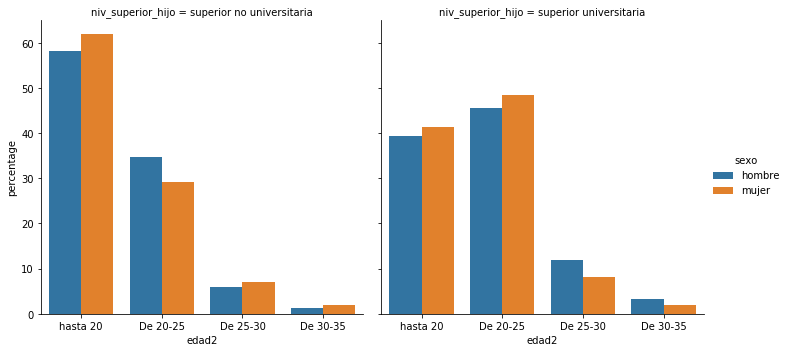

In [32]:
# se crea la variable por grupo de edades
data2017['edad2']=data2017['edad']
data2017['edad2']=pd.cut(data2017.edad, [17, 20, 25, 30, 35], labels=['hasta 20','De 20-25','De 25-30','De 30-35'])
#se normaliza los números
porsexyedad = (data2017.groupby(['niv_superior_hijo','sexo'])['edad2']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
p = sns.catplot(x="edad2", y="percentage", hue="sexo", col= "niv_superior_hijo", data=porsexyedad, kind="bar", order=['hasta 20','De 20-25','De 25-30','De 30-35'])



### 2. Análisis exploratorio a partir del factor Ingresos en el hogar:
#### Se observa que a mayor nivel del gasto del hogar, existe mayor población con nivel superior universitaria que con nivel no universitario. 

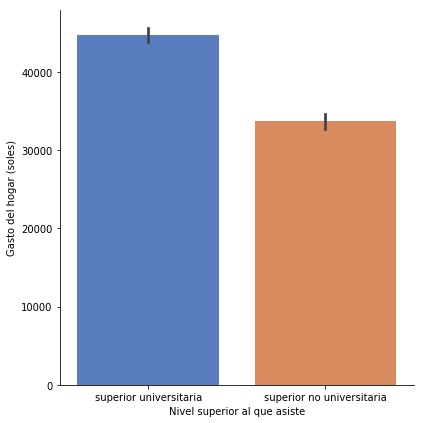

In [33]:
import seaborn as sns
g = sns.catplot(data = data2017, x="niv_superior_hijo", y="gashog2d", 
                height=6, kind="bar", palette="muted")
g.set_ylabels("Gasto del hogar (soles)")
g.set_xlabels("Nivel superior al que asiste")

#### Según los datos recogidos de pobreza, donde el hogar más pobre es "pobre extremo", y el menos pobre es "no pobre", se observa que a mayor nivel depobreza, cae drásticamente el número de matriculados. Asimismo, en los hogares más ricos, habría una gran número de estudiantes matrículados en educación universitaria y educación técnica.

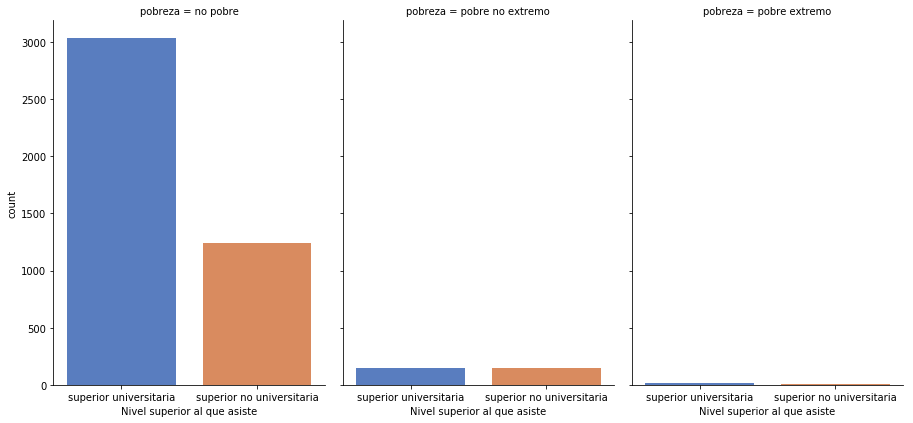

In [34]:
g = sns.catplot(data = data2017, x="niv_superior_hijo",
                height=6, aspect=.7, kind="count", palette="muted", col="pobreza")

g.set_xlabels("Nivel superior al que asiste")


#### A nivel de estrato social, se observa que los estudiantes matriculados en educación universitaria provendrían de estratos más más ricos (como son "A" y "B") que en la educación técnica. O de estratos un poco más altos (estrato "D") en comparación a a los estratos "E" y "rural", donde predominaría la educación técnica.

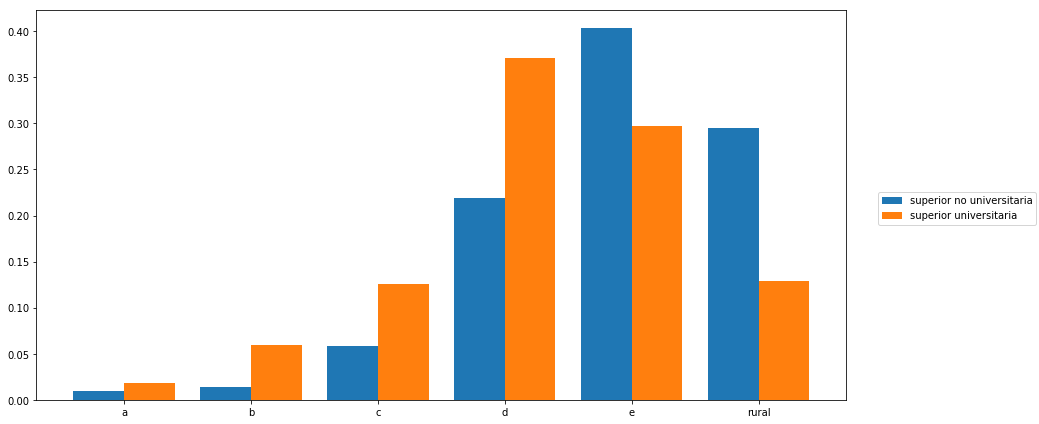

In [35]:
import dexplot as dxp
dxp.aggplot(agg='estrsocial', data=data2017,  hue='niv_superior_hijo', normalize='niv_superior_hijo')

#### Según sexo, y en términos normalizados, se observa que la matrícula universitaria de mujeres es más alta en casi todos los estratos sociales en comparación a la de los hombres. Sin embargo, en la educación técnica,la matrícula de hombres es más alta, mostrando las más altas diferencias en los sectores A y B. 

(<Figure size 1440x432 with 6 Axes>,)

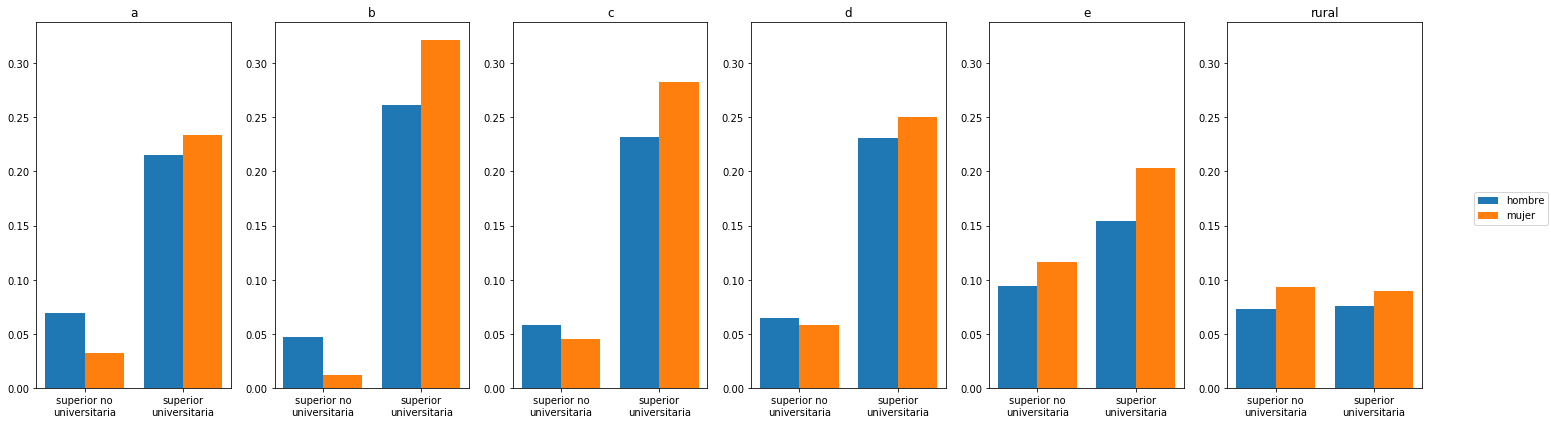

In [36]:
dxp.aggplot(agg='niv_superior_hijo', data=data2017, hue='sexo', kind='bar', 
            col='estrsocial', normalize=('sexo', 'estrsocial'))

### 3. Análisis exploratorio a partir del nivel educativo de los padres (jefe o jefa de hogar):
##### El gasto del hogar estaría relacionado positivamente con mayor nivel educativo del jefe del hogar

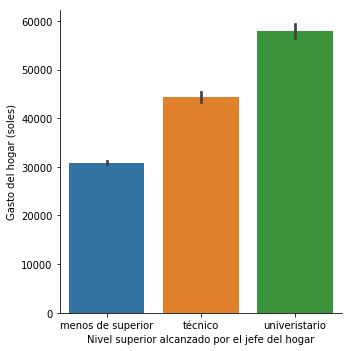

In [37]:
import seaborn as sns
a=sns.catplot(data = data2017, x="cnivel_educat_jh", y="gashog2d", kind="bar")
a.set_xticklabels(['menos de superior', 'técnico', 'univeristario'])
a.set_ylabels("Gasto del hogar (soles)")
a.set_xlabels("Nivel superior alcanzado por el jefe del hogar")

                  
                  

In [38]:
# se crea la variable con los niveles educativos por los padres (jefes de hogar)
data2017['nivel_educat_jh2']=data2017['nivel_educat_jh']
nivel_educat={'nivel_educat_jh2':{'sin nivel':'hasta prim','educación inicial':'hasta prim','primaria incompleta':'hasta prim','primaria completa':'hasta prim',
                                  'secundaria incompleta':'hasta sec','secundaria completa':'hasta sec',
                                  'superior no universitaria incompleta':'hasta técn','superior no universitaria completa':'hasta técn',
                                  'superior universitaria incompleta':'hasta univ','superior universitaria completa':'hasta univ','postgrado universitario':'hasta univ'}}
data2017.replace(nivel_educat,inplace=True)
data2017.head()

,conglome,vivienda,hogar,codperso,nivel_educat_hijo,cod_centro,centro_pub_priv,niv_superior_hijo,nivel_educat_jh,cnivel_educat_jh,...,mieho,sexo,edad,nacio_dist,gashog2d,mieperho,pobreza,estrsocial,edad2,nivel_educat_jh2
0,5001,88,11,3,secundaria,NaN,estatal,NaN,primaria incompleta,1,...,si,hombre,18,nació en este distrito,29938.256674,6,no pobre,e,hasta 20,hasta prim
1,5001,88,11,4,NaN,160000076.0,estatal,NaN,primaria incompleta,1,...,si,mujer,30,nació en este distrito,29938.256674,6,no pobre,e,De 25-30,hasta prim
2,5002,34,11,2,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1,...,si,mujer,21,nació en este distrito,28569.724534,4,no pobre,d,De 20-25,hasta sec
3,5002,34,11,3,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1,...,si,mujer,20,nació en este distrito,28569.724534,4,no pobre,d,hasta 20,hasta sec
4,5002,34,11,4,superior universitaria,160000076.0,estatal,superior universitaria,secundaria completa,1,...,si,mujer,18,nació en este distrito,28569.724534,4,no pobre,d,hasta 20,hasta sec


#### Cuando comparamos los niveles educativos alcanzados de los padres y el tipo de educación en el que están matriculados sus hijos, se observa que en el grupo de los matriculados en el nivel univeristario,  habría mayor proporción de padres que habrían alcanzado "hasta nivel técnico" o "hasta nivel universitario". Mientras que en el caso de los matriculados en educación técnica, los padres habrían alcanzado mayoritariamente "Hasta primaria" o "Hasta secundaria".

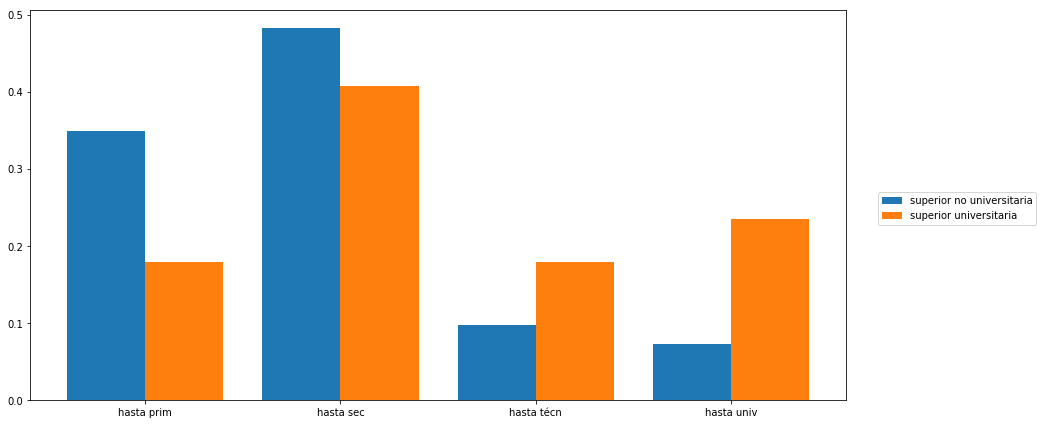

In [39]:
import dexplot as dxp
dxp.aggplot(agg='nivel_educat_jh2', data=data2017,  hue='niv_superior_hijo', normalize='niv_superior_hijo')

### 4. Análisis exploratorio a partir de otros factores:
#### Se observa que en educación técnica, habría una mayor tasa de estudiantes que nacieron en el distrito, lo cual significaría que habría mayor probabilidad de estudiar en donde nacieron; mientras que en educación universitaria, habría mayor tasa de migración.

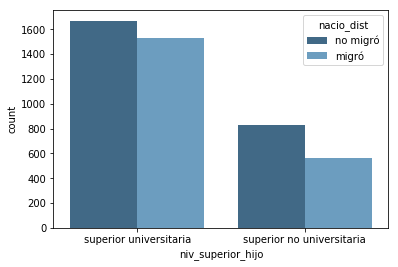

In [40]:
migra={'nacio_dist':{'nació en este distrito':'no migró','pase':'migró'}}
data2017.replace(migra,inplace=True)
g = sns.countplot(data = data2017, x="niv_superior_hijo", hue="nacio_dist", palette="Blues_d" )


In [41]:
matricula_niv_dist = data2017.groupby(["niv_superior_hijo", "nacio_dist","estrsocial"]).agg({"codperso": "sum"})
matricula_niv_dist=matricula_niv_dist.reset_index()
matricula_niv_dist.rename(columns={'codperso':'matrícula'}, inplace=True)

#### Se observa una tendencia de no migración en la mayoría de estratos por encima de las de migración tanto en la educación universitaria como técnica, lo cual indicaría que los estudiantes buscan un centro de estudios cercano a su lugar de origen. Sin embargo, en los estratos más ricos (A y B) de educacion universitaria, sí se evidenciaría una tendencia a la migración. 

(<Figure size 864x432 with 2 Axes>,)

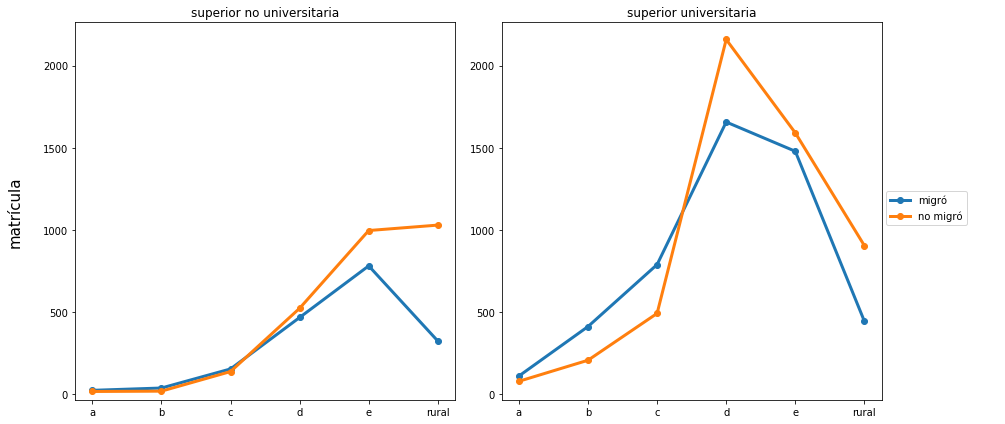

In [42]:
dxp.aggplot(agg='matrícula', data=matricula_niv_dist, groupby='estrsocial', hue='nacio_dist', col= 'niv_superior_hijo', kind='line')

#### A diferencia de los matriculados en educación técnica, en educación universitaria habría una mayor tasa de estudiantes provenientes de centros de estudios no estatales. 

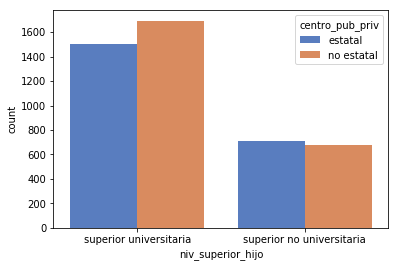

In [43]:
g = sns.countplot(data = data2017, x="niv_superior_hijo", hue="centro_pub_priv", palette="muted")


In [44]:
matricula_niv_centro = data2017.groupby(["niv_superior_hijo", "centro_pub_priv","estrsocial"]).agg({"codperso": "sum"})
matricula_niv_centro=matricula_niv_centro.reset_index()
matricula_niv_centro.rename(columns={'codperso':'matrícula'}, inplace=True)

#### Según estrato social, se observa que por lo general tanto en educación universitaria como técnica, los estudiantes provienen de escuelas privadas, ya que hasta inclusive en estratdos de ingresos bajos como el "D", los estudiantes provenien de escuelas privadas. Lo cual podría explicar que habría una barrera para los provenientes de escuelas públicas, y oferta de universidades con precios medianamente accesibles para estratos de bajos recursos.  

(<Figure size 864x432 with 2 Axes>,)

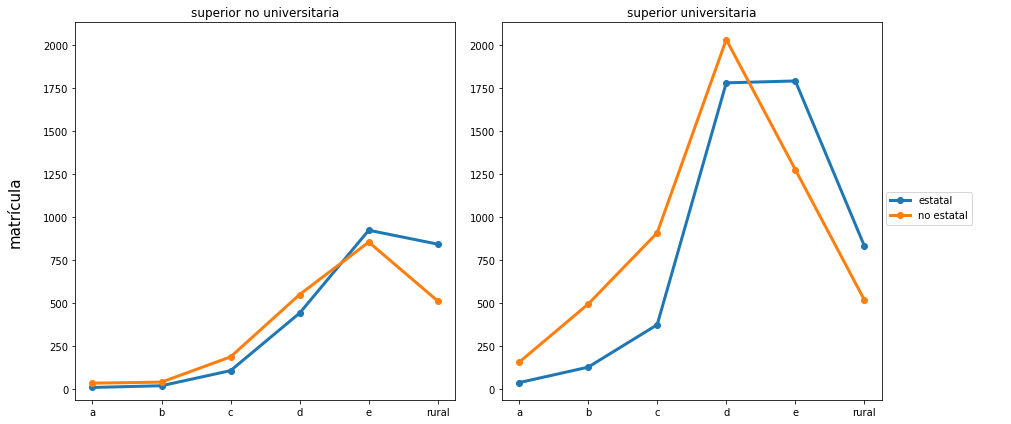

In [45]:
dxp.aggplot(agg='matrícula', data=matricula_niv_centro, groupby='estrsocial', hue='centro_pub_priv', col= 'niv_superior_hijo', kind='line')


### 5. Análisis exploratorio a partir del factor Ubicación geográfica:


In [58]:
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

data2017_dpto=pd.read_excel("https://www.dropbox.com/s/31yb8iiql9rn16u/data2017_dpto.xlsx?dl=1", sheet_name='sheet1', index=False)



In [47]:
estudiantessup_dominio = data2017.groupby(["dominio","niv_superior_hijo"]).codperso.count()
estudiantessup_dominio = estudiantessup_dominio.reset_index()
estudiantessup_dominio

,dominio,niv_superior_hijo,codperso
0,costa centro,superior no universitaria,121
1,costa centro,superior universitaria,365
2,costa norte,superior no universitaria,208
3,costa norte,superior universitaria,445
4,costa sur,superior no universitaria,89
5,costa sur,superior universitaria,270
6,lima metropolitana,superior no universitaria,201
7,lima metropolitana,superior universitaria,529
8,selva,superior no universitaria,265
9,selva,superior universitaria,467


In [48]:
conditions  = [(data2017['dominio']=='costa centro') | (data2017['dominio']=='costa norte')| (data2017['dominio']=='costa sur'),
               (data2017['dominio']=='sierra centro') | (data2017['dominio']=='sierra norte')| (data2017['dominio']=='sierra sur'),
               (data2017['dominio']=='selva'),
              (data2017['dominio']=='lima metropolitana')]
choices     = ['costa','sierra','selva','lima metropolitana']
data2017["dominio2"] = np.select(conditions, choices, default=data2017['dominio'])


#### Cuando se analiza por área geográfica, se observa que la mayor parte proviene de las áreas de la sierra y la costa, tanto para el nivel universitario como para el técnico.

<Figure size 1080x2160 with 0 Axes>

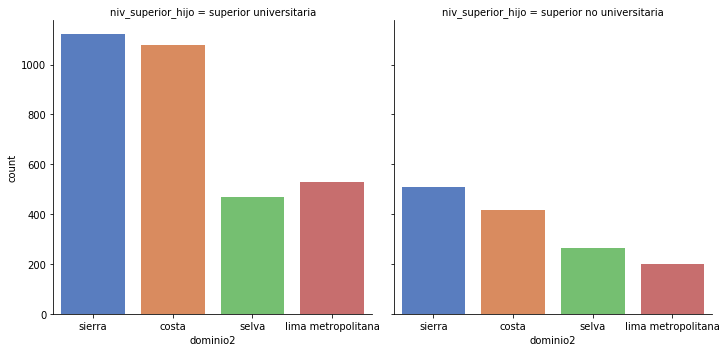

In [49]:

import seaborn as sns
plt.figure(figsize=(15,30))
g = sns.catplot(data = data2017, kind = "count", x="dominio2", col="niv_superior_hijo",order=data2017.dominio2.value_counts().index ,palette="muted")



#### Sin embargo, en términos normalizados a uno, se puede observar si el área geográfica de origen puede estar relacionado o influenciar en llevar estudios universitarios o técnicos. Al respecto, habría indicios para señalar que hay mayor probabilidad de que los estudiantes provenientes de la costa y Lima Metropolitana estudien en una universidad que en un instituto técnico. Mientras que los provenientes de la selva y sierra, mayor probabilidad de cursar estudios técnicos.

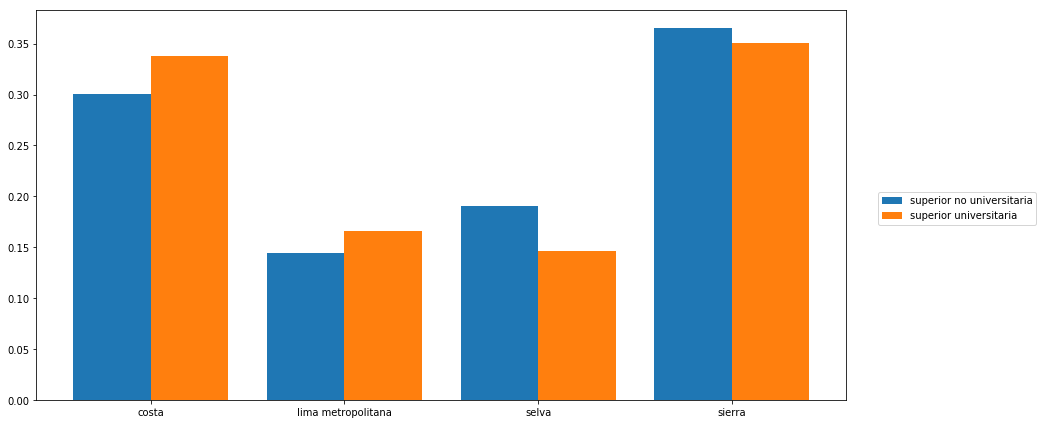

In [50]:
dxp.aggplot(agg='dominio2', data=data2017,  hue='niv_superior_hijo', normalize='niv_superior_hijo')

In [51]:
data2017_dpto['matricula']=data2017_dpto['superior no universitaria']+data2017_dpto['superior universitaria']
data2017_dpto

,NOMBDEP,superior no universitaria,superior universitaria,matricula
0,AMAZONAS,39,125,164
1,ANCASH,51,140,191
2,APURIMAC,20,74,94
3,AREQUIPA,91,174,265
4,AYACUCHO,35,71,106
5,CAJAMARCA,30,66,96
6,CALLAO,54,100,154
7,CUSCO,79,131,210
8,HUANCAVELICA,49,55,104
9,HUANUCO,37,98,135


#### Se observa una matrícula muy alta en el departamento de Lima en comparación a otros departamentos.

Text(0.5, 1.0, 'Matrícula Educación Superior por Dpto, 2017')

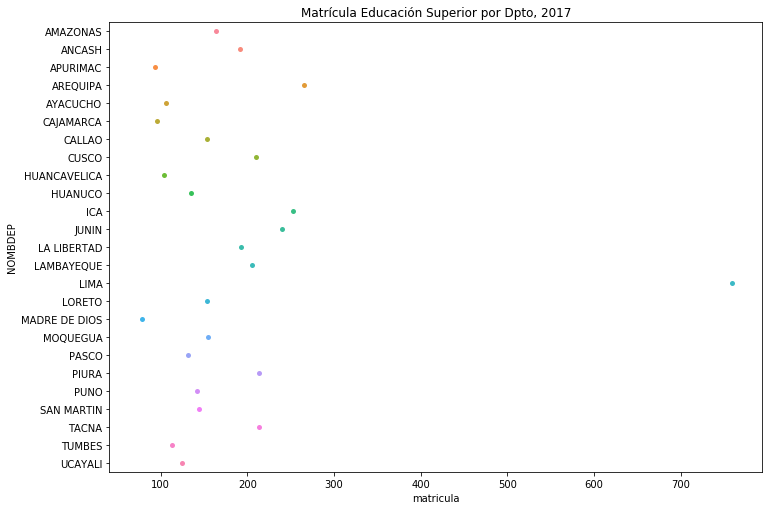

In [52]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.swarmplot(y="NOMBDEP", x="matricula", data=data2017_dpto)
plt.title("Matrícula Educación Superior por Dpto, 2017")
#fig.savefig('example.png')

In [66]:
# se agregan los formatos shapes de los limites geograficos
shp = gpd.GeoDataFrame.from_file('BAS_LIM_DEPARTAMENTO.shp')
#shp = gpd.GeoDataFrame.from_file('https://www.dropbox.com/s/hqwkt691qaz9x0n/BAS_LIM_DEPARTAMENTO.shp?dl=1')
#shp2=pd.read_excel("https://www.dropbox.com/s/8g20ur2yga97tny/shp2.xlsx?dl=1", sheet_name='sheet1', index=False)
shp2=pd.merge(shp,data2017_dpto, how='outer',on=['NOMBDEP'],indicator=True,left_index=True)
shp2.head()


,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,superior no universitaria,superior universitaria,_merge
0,AMAZONAS,84,01,3930646.567,"POLYGON ((212372.2836290381 9332652.146199502,...",39,125,both
1,ANCASH,166,02,3596224.600,"POLYGON ((150666.940918701 9058816.781521223, ...",51,140,both
2,APURIMAC,80,03,2111415.170,"POLYGON ((781311.0345077661 8490376.525884271,...",20,74,both
3,AREQUIPA,109,04,6325588.935,"POLYGON ((518459.3050167466 8278798.441885059,...",91,174,both
4,AYACUCHO,111,05,4350381.783,"POLYGON ((571155.261461679 8654149.130620057, ...",35,71,both


#### Se encontró que los cinco departamentos que concentran la mayor cantidad de matrícula en educación técnica, superan los 68 estudiantes por departamento, y estarían ubicados en el centro-sur y selva (norte)

Text(0.5, 1.0, 'Matrícula Educación Técnica por Dpto, 2017')

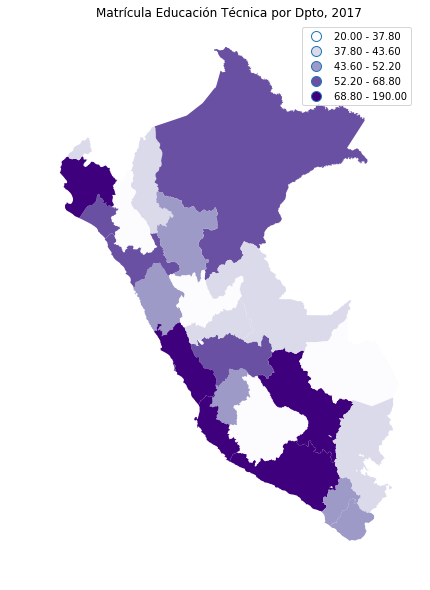

In [67]:
fig, ax = plt.subplots(1, figsize=(20,10))
shp2.plot(ax=ax,column='superior no universitaria', cmap='Purples', legend=True, scheme='quantiles')
_ = ax.axis('off')
ax.set_title("Matrícula Educación Técnica por Dpto, 2017")

#### Mientras que en el caso de educación universitaria, los cinco departamentos que concentran la mayor cantidad de matrícula  superan los 150 estudiantes por departamento, y estarían ubicados en el centro - norte y  sur.

Text(0.5, 1.0, 'Matrícula Educación Universitaria por Dpto, 2017')

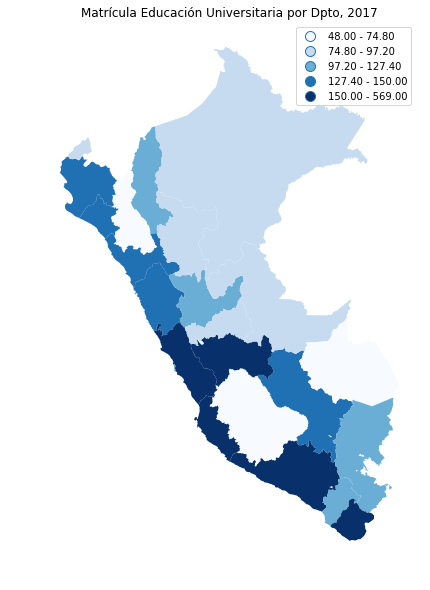

In [68]:
fig, ax = plt.subplots(1, figsize=(20,10))
shp2.plot(ax=ax,column='superior universitaria', cmap='Blues', legend=True, scheme='quantiles')
_ = ax.axis('off')
ax.set_title("Matrícula Educación Universitaria por Dpto, 2017")



### 6. Análisis de la oferta educativa, según si es privada o pública

In [69]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

os.getcwd()
path="C:/Users/claud/Documents/master_data_science/2.herramientas/modulo_ipython/data_python/bases"
os.chdir(path)

data2=pd.read_excel("data2.xlsx", sheet_name='sheet1', index=False)
data3=pd.read_excel("data3.xlsx", sheet_name='sheet1', index=False)
data_costos=pd.read_excel("data_costos.xlsx", sheet_name='sheet1', index=False)

In [70]:
data3.pivot_table("ubigeo",index=["niv2"],columns=["codigo1"],aggfunc="count")

codigo1,IEST Priv.,IEST Púb.,U. Priv,U. Púb.
niv2,,,,
superior no universitaria,842.0,344.0,NaN,NaN
superior universitaria,NaN,NaN,1772.0,1338.0


#### Se observa que la mayor parte de la matrícula superior se concentra en universidades privadas (41%), seguido de las universidades públicas (31%), los institutos privados (19%) y los institutos públicos (8%)

Text(0.5, 1.0, 'Distribución porcentual de estudiantes en educación superior , por tipo de institución')

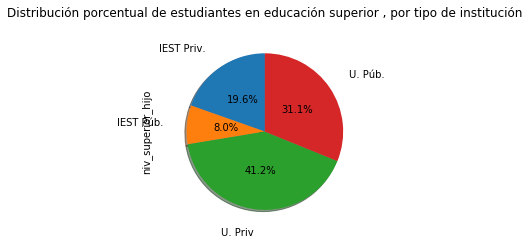

In [71]:
data3.dropna(subset=["niv2"], inplace=True)
import matplotlib.pyplot as plt
estudiantes_centro = data3.groupby("codigo1").niv_superior_hijo.count()
estudiantes_centro
estudiantes_centro.plot.pie(autopct='%1.1f%%', pctdistance=0.5, labeldistance=1.3, shadow=True, startangle=90, radius=0.9)
plt.title("Distribución porcentual de estudiantes en educación superior , por tipo de institución")

#### Se observa una alta presencia de la educacion privada en los estratos sociales más altos (A y B), pero sigue siendo importante también en los  estratos sociales más bajos (D y E), donde la matrícula en institutos y universidades privadas estaría por encima del 40%.

(<Figure size 1440x432 with 6 Axes>,)

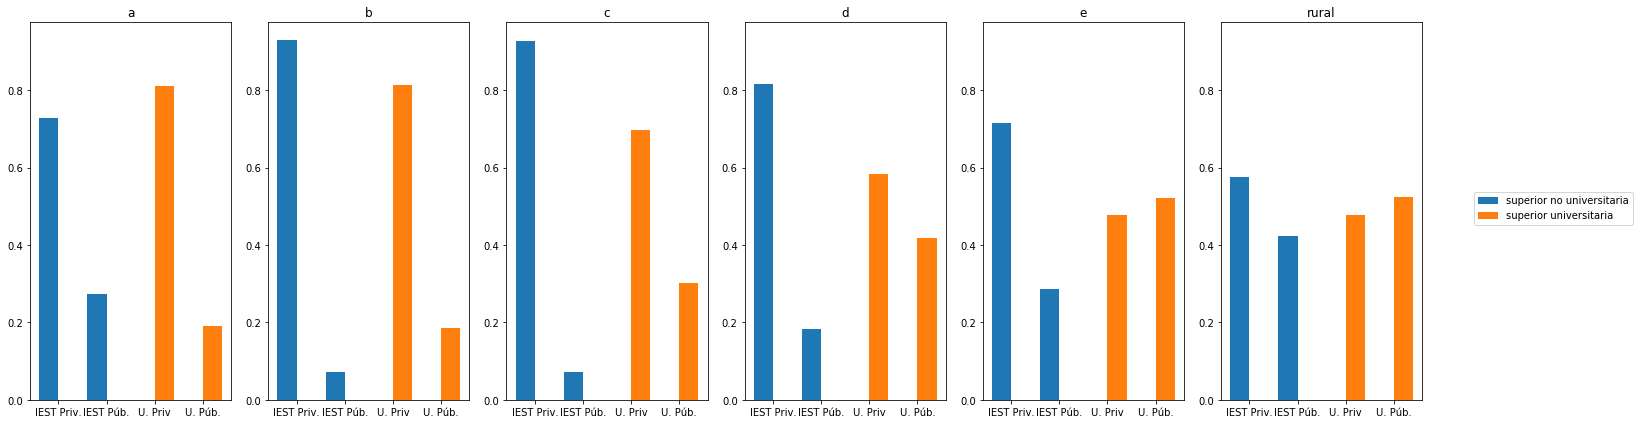

In [72]:
import seaborn as sns
dxp.aggplot(agg='codigo1', data=data3,  hue='niv_superior_hijo', col="estrsocial", normalize=('niv_superior_hijo','estrsocial'))

#### Las diez universidades con mayor matrícula

In [73]:
cols = ["nombre", "niv2"]
data3[data3.niv2 == 'superior universitaria'][cols].groupby("nombre").count().sort_values("niv2", ascending=False).head(10)
#presentar en porcentaje mejor

,niv2
nombre,
Universidad Alas Peruanas,232
Universidad Particular César Vallejo,173
Universidad Nacional San Luis Gonzaga,112
Universidad Nacional de San Agustín,80
Universidad Particular del Norte,77
Universidad Nacional Daniel Alcídes Carrión,75
Universidad Católica Los Ángeles de Chimbote,75
Universidad José Carlos Mariátegui,68
Universidad P. Antenor Orrego,68


#### Los diez institutos técnicos con mayor matrícula

In [74]:
cols = ["nombre", "niv2"]
data3[data3.niv2 == 'superior no universitaria'][cols].groupby("nombre").count().sort_values("niv2", ascending=False).head(10)


,niv2
nombre,
Instituto de Educación Superior Tecnológica (IEST) Escuela Superior Privada De Tecnologia Senati,283
Instituto de Educación Superior Tecnológica (IEST) Sabio Nacional Antunez De Mayolo-Telesup,32
Instituto de Educación Superior Tecnológica (IEST) De Formacion Bancaria Ifb,31
Instituto de Educación Superior Tecnológica (IEST) Cibertec,23
Instituto de Educación Superior Tecnológica (IEST) Idat,19
Instituto de Educación Superior Tecnológica (IEST) Peruano De Sistemas Sise,16
Instituto de Educación Superior Tecnológica (IEST) San Ignacio De Loyola - Lima,13
Instituto de Educación Superior Tecnológica (IEST) Huancavelica,12
Instituto de Educación Superior Tecnológica (IEST) Santa Angela,11


### SECCIÓN C: CONCLUSIONES
Se analizó 6 grupos de variables, de las cuales se puede concluir que
- A nivel individual (edad y sexo): La educación técnica sería predominantemente masculina, mientras que la universitaria, predominantemente femenina. La mayor parte de la población estudiantil se concentra hasta los 25 años, que es cercano a la edad normativa de estudios, y durante esos grupos de edades, la matrícula de mujeres es mayor a la de los hombres.

- A nivel del hogar (nivel de ingresos, pobreza, y estrato social): se observa que a mayor nivel depobreza, cae drásticamente el número de matriculados en educación superior. Asimismo, a mayor nivel del gasto del hogar, existe mayor población con nivel superior universitaria que con nivel no universitario. Según estrato social, se observa que los estudiantes matriculados en educación universitaria provendrían de estratos más ricos (como son "A" y "B") que en la educación técnica. O de estratos un poco más altos (estrato "D") en comparación a a los estratos "E" y "rural", donde predominaría la educación técnica.

- A nivel de los padres (nivel educativo alcanzado): Cuando comparamos los niveles educativos alcanzados de los padres y el tipo de educación en el que están matriculados sus hijos, se observa que en el grupo de los matriculados en el nivel univeristario, habría mayor proporción de padres que habrían alcanzado "hasta nivel técnico" o "hasta nivel universitario". Mientras que en el caso de los matriculados en educación técnica, los padres habrían alcanzado mayoritariamente "Hasta primaria" o "Hasta secundaria".

- Otros factores: Se observa una tendencia de no migración en la mayoría de estratos tanto en la educación universitaria como técnica, lo cual indicaría que los estudiantes buscan un centro de estudios cercano a su lugar de origen. Sin embargo, en los estratos más ricos (A y B) de educacion universitaria, sí se evidenciaría una tendencia a la migración. Por otro lado, en educación universitaria habría una mayor tasa de estudiantes provenientes de centros de estudios privados, en comparación a los matriculados en educación técnica. 

- A nivel de la ubicación geográfica: Cuando se analiza por área geográfica, se observa que la mayor parte proviene de las áreas de la sierra y la costa, tanto para el nivel universitario como para el técnico.  En términos normalizados a uno, se puede observar si el área geográfica de origen puede estar relacionado o influenciar en llevar estudios universitarios o técnicos. Al respecto, habría indicios para señalar que hay mayor probabilidad de que los estudiantes provenientes de la costa y Lima Metropolitana estudien en una universidad que en un instituto técnico. Mientras que los provenientes de la selva y sierra, mayor probabilidad de cursar estudios técnicos. Se observa una matrícula muy alta en el departamento de Lima en comparación a otros departamentos.

- Según si la oferta educativa es privada o pública: Se observa que la mayor parte de la matrícula superior se concentra en universidades privadas (41%), seguido de las universidades públicas (31%), los institutos privados (19%) y los institutos públicos (8%). Se observa una alta presencia de la educacion privada en los estratos sociales más altos (A y B), pero sigue siendo importante también en los estratos sociales más bajos (D y E), donde la matrícula en institutos y universidades privadas estaría por encima del 40%.